In [520]:
import pandas as pd
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
from keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from keras.models import Sequential
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt

In [521]:
df = pd.read_excel("./alldata.xlsx")

In [522]:
print(df)

           Date    Price     Open     High      Low   Vol.  Change %  \
0    2010-07-18      0.1      0.0      0.1      0.1   0.08      0.00   
1    2010-07-19      0.1      0.1      0.1      0.1   0.57      0.00   
2    2010-07-20      0.1      0.1      0.1      0.1   0.26      0.00   
3    2010-07-21      0.1      0.1      0.1      0.1   0.58      0.00   
4    2010-07-22      0.1      0.1      0.1      0.1   2.16      0.00   
...         ...      ...      ...      ...      ...    ...       ...   
4932 2024-01-18  41292.7  42763.5  42908.0  40682.6  70.35     -3.45   
4933 2024-01-19  41648.0  41293.8  42164.6  40305.4  72.64      0.86   
4934 2024-01-20  41695.4  41647.6  41858.0  41449.5  22.27      0.11   
4935 2024-01-21  41583.2  41695.4  41878.0  41504.5  16.11     -0.27   
4936 2024-01-22  39556.4  41581.7  41684.9  39468.4  85.05     -4.87   

      FEDFUNDS       Gold  
0         0.18  1204.7500  
1         0.18  1190.2500  
2         0.18  1181.5000  
3         0.18  1191.25

In [523]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4937 entries, 0 to 4936
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      4937 non-null   datetime64[ns]
 1   Price     4937 non-null   float64       
 2   Open      4937 non-null   float64       
 3   High      4937 non-null   float64       
 4   Low       4937 non-null   float64       
 5   Vol.      4937 non-null   float64       
 6   Change %  4937 non-null   float64       
 7   FEDFUNDS  4937 non-null   float64       
 8   Gold      4937 non-null   float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 347.3 KB


In [524]:
null_rows = df[df.isnull().any(axis=1)]

# Hiển thị kết quả
print("Các hàng có giá trị null:")
print(null_rows)

Các hàng có giá trị null:
Empty DataFrame
Columns: [Date, Price, Open, High, Low, Vol., Change %, FEDFUNDS, Gold]
Index: []


<Axes: >

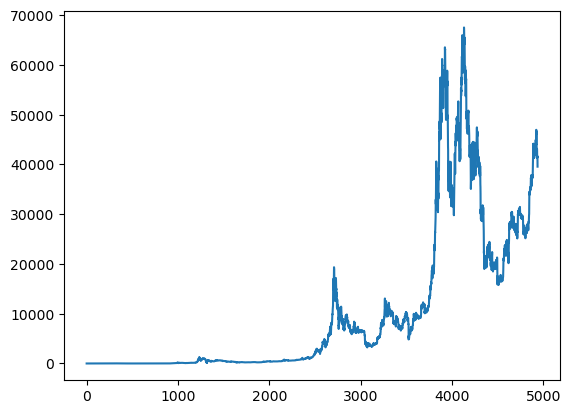

In [525]:
df['Price'].plot()

In [527]:
output = pd.DataFrame(df['Price'])
features = ['Open', 'High', 'Low', 'Vol.', 'Change %', 'FEDFUNDS', 'Gold']

In [528]:
"""from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df[features])
feature_transform = pd.DataFrame(columns=features, data=feature_transform, index=df.index)
print(feature_transform)"""

'from sklearn.preprocessing import MinMaxScaler\nscaler = MinMaxScaler()\nfeature_transform = scaler.fit_transform(df[features])\nfeature_transform = pd.DataFrame(columns=features, data=feature_transform, index=df.index)\nprint(feature_transform)'

In [529]:
#Splitting to Training set and Test set
timesplit= TimeSeriesSplit(n_splits=30)
for train_index, test_index in timesplit.split(df[features]):
        X_train, X_test = df[features][:len(train_index)], df[features][len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output[:len(train_index)].values.ravel(), output[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [530]:
trainX = np.array(X_train)
testX = np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

In [533]:
lstm = Sequential()
lstm.add(LSTM(100, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_absolute_percentage_error', optimizer='adam')
lstm.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_26 (LSTM)              (None, 100)               43200     
                                                                 
 dense_26 (Dense)            (None, 1)                 101       
                                                                 
Total params: 43301 (169.14 KB)
Trainable params: 43301 (169.14 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [534]:
history=lstm.fit(X_train, y_train, epochs=100, batch_size=2, verbose=1, shuffle=False)

Epoch 1/100


2375/2375 [==============================] - 5s 1ms/step - loss: 41.0673
Epoch 2/100
2375/2375 [==============================] - 3s 1ms/step - loss: 222.9386
Epoch 3/100
2375/2375 [==============================] - 4s 1ms/step - loss: 95.8034
Epoch 4/100
2375/2375 [==============================] - 3s 1ms/step - loss: 22.8861
Epoch 5/100
2375/2375 [==============================] - 3s 1ms/step - loss: 24.4093
Epoch 6/100
2375/2375 [==============================] - 4s 2ms/step - loss: 22.1071
Epoch 7/100
2375/2375 [==============================] - 5s 2ms/step - loss: 22.4529
Epoch 8/100
2375/2375 [==============================] - 4s 2ms/step - loss: 24.9080
Epoch 9/100
2375/2375 [==============================] - 3s 1ms/step - loss: 17.6881
Epoch 10/100
2375/2375 [==============================] - 4s 2ms/step - loss: 21.9289
Epoch 11/100
2375/2375 [==============================] - 4s 2ms/step - loss: 15.3554
Epoch 12/100
2375/2375 [==============================] - 4s 2ms/step - lo

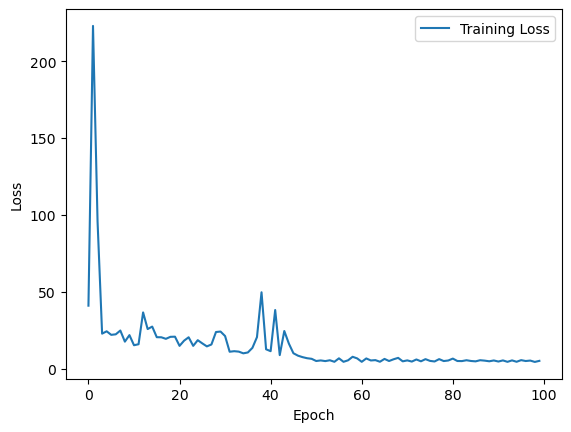

In [535]:
# In biểu đồ sự tiến triển của mô hình
import matplotlib.pyplot as plt
    
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [536]:
y_pred= lstm.predict(X_test)

5/5 [==============================] - 0s 2ms/step


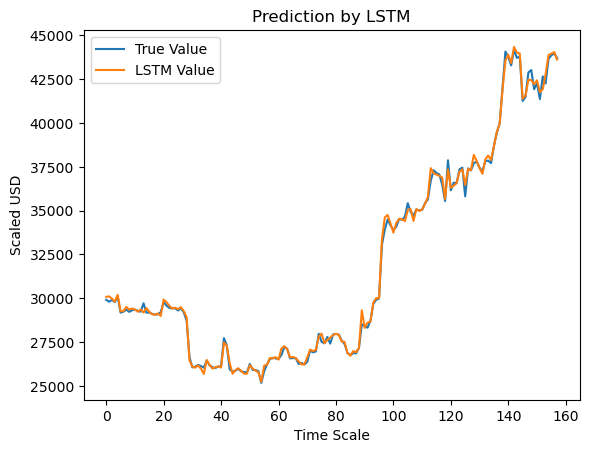

In [537]:
#Predicted vs True Adj Close Value – LSTM
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title('Prediction by LSTM')
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()

In [538]:
mape = mean_absolute_percentage_error(y_test,y_pred)
print("MAPE = ", mape)

MAPE =  0.004553073198435305


In [553]:
df_demo = df.iloc[4915:4916]
X_demo=df_demo[['Open', 'High', 'Low', 'Vol.', 'Change %', 'FEDFUNDS', 'Gold']]
demoX = np.array(X_demo)
X_demo = demoX.reshape(X_demo.shape[0], 1, X_demo.shape[1])
X_demo.shape

(1, 1, 7)

In [554]:
y_pred_demo = lstm.predict(X_demo)
y_pred_demo

1/1 [==============================] - 0s 57ms/step


array([[43785.77]], dtype=float32)